In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import math as math
import scipy as scipy
from scipy.misc import comb
from scipy import optimize

Question 2 : For interpolation with equidistant nodes, the function as above achives its maximum in the outermost intervals, that is, in the intervals (x;0 x;1) and (x;n-1,x;n). So in order to compute the Lebesgue constant Ln, we need to locate one of the global maximums. Implemet the Newton Raphson or another rootfinding method and apply it to the derivative of the function to complete this task. One possible intial guess is to starat with the midpoint of (x;0, x;1). Make sure that the method nonveres to the desired zero of d/dx * . Plot the graph of ||Ln|| against n and experimentally confirm the law ||Ln||~ 2^n.

In [51]:
def Lagrange(x, nn, nodelist):
    #computes Lagrange coefficient at a point k and for nn nodes
    somme=0 #initializing
    for i in range(nn): 
        prod=1 #initializing
        for j in range (nn): #compute Lagrange interpolation
            if j!=i :
                prod=prod*(x-nodelist[j])/(nodelist[i]-nodelist[j])
            else :
                prod=prod*1
        somme=somme+abs(prod)
    y=somme #assign f(x) to y
    return y

In [52]:
def Lagrangeprime (x,nn,nodelist):
    #computes derivative of Lagrange polynomial at point x for nn nodes
    somme=0 #initializing
    for k in range(nn):
        sm=0 #initializing
        for i in range(nn):
            prod=1 #initializing
            if (i!=k):
                factor=1/(nodelist[k]-nodelist[i])
                for j in range(nn):
                    if (j!=i):
                        if(j!=k):
                            prod = prod*((x-nodelist[j])/(nodelist[k]-nodelist[j]))
                sm=sm+prod*(factor)
    somme=somme+abs(sm)
    y=somme
    return somme           

In [53]:
def root(nn, nodelist, a,b) :
    #finds root for Lagrange prime in interval a,b
    midpoint=(a+b)/2
    r = scipy.optimize.newton(Lagrangeprime, midpoint,args=(nn, nodelist), maxiter=150) #using scipy library
    return r

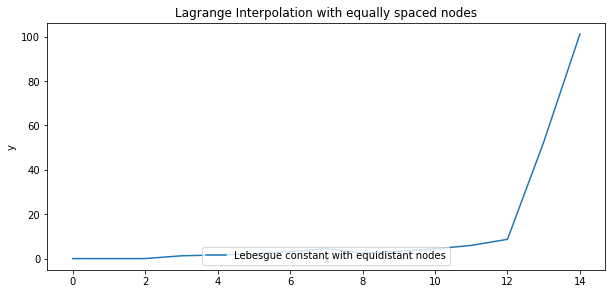

In [54]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)

nn=15 # maximal number of nodes
nlist = [i for i in range (nn)]
Llist= [0 for k in range (nn)]

for i in range (nn):
    if i>2 : #if [xo;x1] different from [xn-1,xn]#print i #debug
        #print i
        nodelist = np.linspace(-1,1,i) #get the nodes x coordinates#print nodelist
        rmin= root(i, nodelist, nodelist[0], nodelist[1]) #finds root of derivative in [x;0,x;1]
        rmax= root(i, nodelist, nodelist[i-2], nodelist[i-1]) #finds root of derivative in [x;n,x;n+1]
        Llist[i]=max(Lagrange(rmin,i, nodelist), Lagrange(rmax, i, nodelist))# computes value at root of derivative
        #hence computes local maximum at both outermost intervals and keep the maximum value.
        #print Llist[i] #printing out exact value to compute C
        
ax1.plot(nlist,Llist,label='Lebesgue constant with equidistant nodes')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Lagrange Interpolation with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower center")
plt.show()

As it turns out, with n bigger than 15 we run into convergence problems, were the root of the derivative doesnt converge after 150 iterations. Therefore I can only guess the Lebesgue constant does explode for n large hence ||Ln||~2^n.